# Decision Tree

## Imports
In this section we import the libraries necessary to analyse our data.

In [ ]:
import matplotlib as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay

## Import & Pre-process Data
https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data

In [177]:
# Read in data
df=pd.read_csv("cardio_train.csv", sep=";")

# Drop unnecessary columns
df = df.dropna(axis=0)
df = df.drop('id', axis=1)
df = df.drop('height', axis=1)

# Drop weights below 40kg
for weight in df['weight']:
    if weight < 40:
        df['weight'] = df['weight'].drop(axis=0, index=0)

def categorize_weight(weight):
    if weight >= 40 and weight <= 60:
        return '40 - 60'
    elif weight >= 61 and weight <= 80:
        return '61 - 80'
    elif weight >= 81 and weight <= 100:
        return '81 - 100'
    else:
        return '100+'

df['weight_category'] = df['weight'].apply(categorize_weight)

# Get average blood pressure using high and low values
df['bp_mean'] = df[['ap_hi', 'ap_lo']].mean(axis=1)

# Categorize average blood pressure for classification
def categorize_bp(mean_bp):
    if mean_bp > 120:
        return 'High'
    elif mean_bp >= 80:
        return 'Normal'
    else:
        return 'Low'

# Apply the categorization function
df['bp_category'] = df['bp_mean'].apply(categorize_bp)

# Convert ages to years
df['ages_year'] = df['age'] // 365

# Categorize ages into age groups
def categorize_age(ages_year):
    if ages_year < 18:
        return 'Under 18'
    elif ages_year >= 18 and ages_year <= 21:
        return '18-21'
    elif ages_year > 21 and ages_year <= 40:
        return '21-40'
    elif ages_year > 40 and ages_year <= 60:
        return '41-60'
    elif ages_year > 60 and ages_year <= 80:
        return '61-80'
    else:
        return '80+'

# Apply categorization 
df['age_category'] = df['ages_year'].apply(categorize_age)

# Encode ages
encoder = LabelEncoder()
df['weight_category_encoded'] = encoder.fit_transform(df['weight_category'])
df['bp_category_encoded'] = encoder.fit_transform(df['bp_category'])
df['age_category_encoded'] = encoder.fit_transform(df['age_category'])

df.head()

,age,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,weight_category,bp_mean,bp_category,ages_year,age_category,weight_category_encoded,bp_category_encoded,age_category_encoded
0,18393,2,NaN,110,80,1,1,0,0,1,0,100+,95.0,Normal,50,41-60,0,2,1
1,20228,1,85.0,140,90,3,1,0,0,1,1,81 - 100,115.0,Normal,55,41-60,3,2,1
2,18857,1,64.0,130,70,3,1,0,0,0,1,61 - 80,100.0,Normal,51,41-60,2,2,1
3,17623,2,82.0,150,100,1,1,0,0,1,1,81 - 100,125.0,High,48,41-60,3,0,1
4,17474,1,56.0,100,60,1,1,0,0,0,0,40 - 60,80.0,Normal,47,41-60,1,2,1


## Fit Data

In [178]:
# Split data into training and testing
X = df[['gender', 'weight_category_encoded', 'age_category_encoded',  'bp_category_encoded', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
Y = df['cardio']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Define tree model and fit data
tree = DecisionTreeClassifier(class_weight='balanced')
tree.fit(X_train, Y_train)

# Use tree to predict and display accuracy
Y_pred = tree.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.66


## Display Data

NameError: name 'precision_score' is not defined

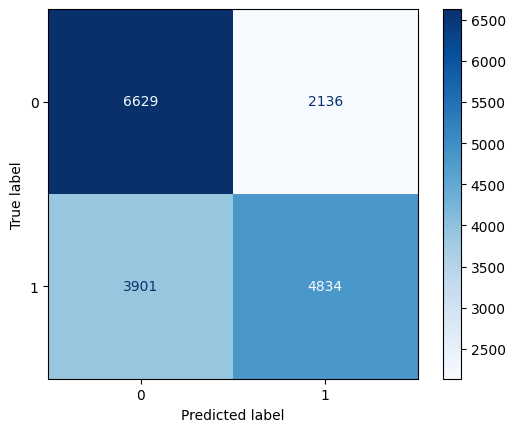

In [182]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred, cmap='Blues')

print(f"Precision: {precision_score(Y_test, Y_pred):.2f}")
print(f"Recall: {recall_score(Y_test, Y_pred):.2f}")
print(f"F1-Score: {f1_score(Y_test, Y_pred):.2f}")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.2f}")